In [25]:
# Functional gradient descent for Euler-Lagrange optimization problem

'''
Algorithm design
1) Translate the optimization problem into a system of ODE
2) Use FD method to numerically solve the equation

The function q includes a main variable and a ficitious time variable tau

Group preserving scheme
A group-preserving scheme (GPS) can preserve the internal symmetry group of the considered ODEs system. 

Reference
- David Luenger's chapter 7 optimization of functionals
- UCLA lectures
'''

#--- Initialization
from __future__ import division
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

sys.setrecursionlimit(1500)

'''
Boundary condition
q(0, tau) = 0
q(1, tau) = 1
q(t, 0) = t**3
step = 0.01
'''

h1 = 0.001 # time step
h2 = 0.05 # note that h1 << h2*2
tau_limit = 10
tau = 0 # fictitious time variable
noise = 0

a = int(1/h2)
b = tau_limit*int(1/h1)
g = np.zeros((a+1, b+1)) # initializing gradient table for faster computation and avoid recursions
print g.shape

(21L, 10001L)


In [26]:
#--- Dynamic programming approach
print g0

for i in range(a+1):
    for j in range(b+1):
        if j == 0:
            g[i,j] = (i*h2)**3
        else:
            if i == 0:
                g[i,j] = 0
            elif i == a:
                g[i,j] = 1
            else:
                g[i,j] = g[i, j - 1] + (h1/(h2*2))*(g[i + 1, j - 1] - 2*g[i, j - 1] + g[i - 1, j - 1])

print g

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.25000000e-04   1.22500000e-04   1.20050000e-04 ...,   2.37254679e-92
    2.32509586e-92   2.27859394e-92]
 [  1.00000000e-03   9.81250000e-04   9.62850000e-04 ...,   2.61028567e-90
    2.55831721e-90   2.50738337e-90]
 ..., 
 [  7.29000000e-01   7.20561250e-01   7.12219650e-01 ...,   3.11948031e-72
    3.06194715e-72   3.00547463e-72]
 [  8.57375000e-01   8.47517500e-01   8.37772763e-01 ...,   1.89223280e-71
    1.85750763e-71   1.82341942e-71]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]]


In [13]:
#--- Recursive algorithm

'''
diff_q(t, tau + h) = (q(t, tau + h) - q(t, tau))/h
diff_q(t, tau + h) = (q(t + h, tau) - 2*q(t, tau) + q(t - h, tau))/h**2 RHS is the second order derivative of q
'''

def q(t, tau):
    if tau == 0:
        return t**3
    else:
        if t < h2:
            return 0
        elif t > 1-h2:
            return 1
        else:
            return q(t, tau - h1) + (h1/(h2*2))*(q(t + h2, tau - h1) - 2*q(t, tau - h1) + q(t - h2, tau - h1))
        

0.00115


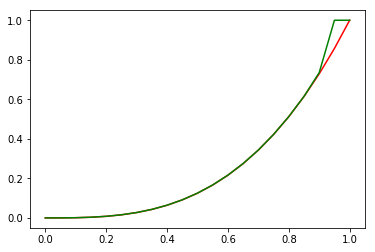

In [21]:
'''
Plot q
Observe function plot for tau = 0, 1, 10, 100
'''
x = np.linspace(0, 1, 21)
tau = 0.01

y0 = q(x, 0.00)
y1 = []
y2 = []
for i in range(int(1/h2)+1):
    y1.append(q(i*h2, 0.005))
    y2.append(q(i*h2, 0.01))

plt.plot(x, y0, 'r')
plt.plot(x, y1, 'g')
plt.show()

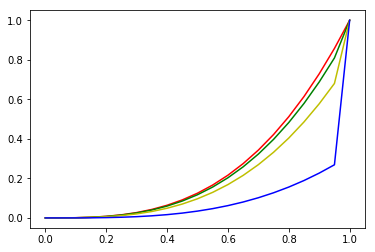

In [34]:
# Plot for DP approach

g0 = g[:,0]
g5 = g[:,5]
g20 = g[:,20]
g100 = g[:,100]

plt.plot(x, g0, 'r')
plt.plot(x, g5, 'g')
plt.plot(x, g20, 'y')
plt.plot(x, g100, 'b')
plt.show()

In [ ]:
#--- von Neumann analysis
'''
After we have discretized our problem. The question remains on how to choose ∆t 
to ensure that the numerical scheme is stable and converges. This will be done later.
'''
